# Índice

1. [Carga y limpieza de los datos](#1-carga-y-limpieza-de-los-datos)  
   1.1 [Import de las librerías](##11-import-de-las-librerias)  
   1.2 [Funciones auxiliares](##12-funciones-auxiliares)  
   1.3 [Charge dataSet](##13-charge-dataset)  
   1.4 [Control Variables](##14-control-variables)  
   1.5 [Correlacion](##15-correlacion)  
   1.6 [Advanced](##16-advanced)  
   1.7 [Exportar CSV](##17-exportar-csv)  
   1.8 [Create Test](##18-create-test)

# 1. Carga y limpieza de los datos

## 1.1 Importación de las librerias

In [1736]:
import pandas as pd
import numpy as np

from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

## 1.2 Funciones auxiliares

In [1737]:
def extract_month(date):
    if pd.isna(date):
        return 0
    return datetime.strptime(date, '%d-%b-%y').month

In [1738]:
def month_to_quarter(month):
    if month == 0:
        return 0
    return np.ceil(month / 3).astype(int)

## 1.3 Carga del Dataset

In [1739]:
url = "data/train.csv" 
data = pd.read_csv(url)
df = data.copy()

Configuramos Pandas para mostrar todas las columnas de un DataFrame al imprimirlo, y luego mostramos las primeras filas del DataFrame df.

In [1740]:
pd.set_option('display.max_columns', None)
df.head()

,id,LoanNr_ChkDgt,Name,City,State,Bank,BankState,ApprovalDate,ApprovalFY,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,Accept
0,bd9d6267ec5,1523195006,"P-SCAPE LAND DESIGN, LLC",NORTHFIELD,OH,CITIZENS BANK NATL ASSOC,RI,1-Nov-05,2006,2,2.0,0,2,0,1,N,N,31-Dec-05,"$8,000.00",$0.00,1
1,9eebf6d8098,1326365010,The Fresh & Healthy Catering C,CANTON,OH,"FIRSTMERIT BANK, N.A.",OH,6-Jun-05,2005,2,2.0,1,2,1,1,N,N,31-Jul-05,"$166,000.00",$0.00,1
2,83806858500,6179584001,AARON MASON & HOWE LLC,SAWYERWOOD,OH,"PNC BANK, NATIONAL ASSOCIATION",OH,18-Mar-03,2003,2,2.0,4,2,1,2,Y,N,31-Mar-03,"$25,000.00",$0.00,1
3,a21ab9cb3af,8463493009,MID OHIO CAR WASH,COLUMBUS,OH,THE HUNTINGTON NATIONAL BANK,OH,28-Jun-95,1995,2,2.0,0,0,1,0,N,N,31-Jan-96,"$220,100.00",$0.00,1
4,883b5e5385e,3382225007,Bake N Brew LLC,Newark,OH,THE HUNTINGTON NATIONAL BANK,OH,16-Apr-09,2009,0,1.0,0,0,0,1,N,N,31-May-09,"$25,000.00",$0.00,0


Con *Info* desplegamos la información del dataframe para saber con que datos trabajaremos en cada una de las columnas

In [1741]:
df.info

<bound method DataFrame.info of                 id  LoanNr_ChkDgt                            Name        City  \
0      bd9d6267ec5     1523195006        P-SCAPE LAND DESIGN, LLC  NORTHFIELD   
1      9eebf6d8098     1326365010  The Fresh & Healthy Catering C      CANTON   
2      83806858500     6179584001          AARON MASON & HOWE LLC  SAWYERWOOD   
3      a21ab9cb3af     8463493009               MID OHIO CAR WASH    COLUMBUS   
4      883b5e5385e     3382225007                 Bake N Brew LLC      Newark   
...            ...            ...                             ...         ...   
22830  4f9443d2a46     1573725008    SIBILA RACE ENGINEERING, INC   MASSILLON   
22831  798db2753a7     2011184008     ENVIRO SHIELD POWER WASHING  SPRINGBORO   
22832  ddb3c5e9bff     4082983001  MAINLINE TRCK&TRAILR SRVC, INC     BEDFORD   
22833  407200a5dfe     7783283010                  TIN BOX STUDIO  CINCINNATI   
22834  eaa66193392     1513375008                     Lowex, Inc.      Dayton

Gracias a *shape* podemos saber las dimensiones del dataframe, de esta maenra podemos saber la cantidad de filas que tenemos en un incio y la cantidad de columnas con las que trabajaremos

In [1742]:
df.shape

(22835, 21)

Visualización del nombre de todas las columnas para plantear la limpieza

In [1743]:
df.columns

Index(['id', 'LoanNr_ChkDgt', 'Name', 'City', 'State', 'Bank', 'BankState',
       'ApprovalDate', 'ApprovalFY', 'NoEmp', 'NewExist', 'CreateJob',
       'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc',
       'DisbursementDate', 'DisbursementGross', 'BalanceGross', 'Accept'],
      dtype='object')


Visualización del estadisticos de las columnas numericas para plantear la limpieza

In [1744]:
df.select_dtypes(include=['int64', 'float64']).describe()

,LoanNr_ChkDgt,ApprovalFY,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,Accept
count,2.283500e+04,22835.000000,22835.000000,22833.000000,22835.000000,22835.000000,22835.000000,22835.000000,22835.000000
mean,4.367086e+09,2001.596628,12.368995,1.298734,18.479571,20.960981,3232.818831,0.832582,0.832231
std,2.557573e+09,6.198582,68.142670,0.458860,377.130205,377.219172,13631.291286,0.681753,0.373669
min,1.000554e+09,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.183700e+09,1997.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.647265e+09,2003.000000,5.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,6.282694e+09,2006.000000,12.000000,2.000000,2.000000,4.000000,1.000000,1.000000,1.000000
max,9.995603e+09,2014.000000,7538.000000,2.000000,8800.000000,8800.000000,92006.000000,2.000000,1.000000


## 1.4 Limpieza de los datos

### 1.4.1 Estudio de las columnas

| **Field Name** | **Data Type** | **Description** |
| --- |  --- |  --- |
| **id** | Text | Identifier of the data instance |
| **LoanNr\_ChkDgt** | Text | Identifier of the loan petition |
| **Name** | Text | Borrower name |
| **City** | Text | Borrower city |
| **State** | Text | Borrower state |
| **Bank** | Text | Bank name |
| **BankState** | Text | Bank state |
| **ApprovalDate** | Date/Time | Date SBA commitment issued |
| **ApprovalFY** | Text | Fiscal year of commitment |
| **NoEmp** | Number | Number of business employees |
| **NewExist** | Text | 1 = Existing business, 2 = New business |
| **CreateJob** | Number | Number of jobs created |
| **RetainedJob** | Number | Number of jobs retained |
| **FranchiseCode** | Text | Franchise code, (00000 or 00001) = No franchise |
| **UrbanRural** | Text | 1 = Urban, 2 = rural, 0 = undefined |
| **RevLineCr** | Text | Revolving line of credit: Y = Yes, N = No |
| **LowDoc** | Text | LowDoc Loan Program: Y = Yes, N = No |
| **ChgOffDate** | Date/Time | The date when a loan is declared to be in default (no en Dataframe)|
| **DisbursementDate** | Date/Time | Disbursement date |
| **DisbursementGross** | Currency | Amount disbursed |
| **BalanceGross** | Currency | Gross amount outstanding |
| **Accept** | Text | Loan approval status. 0 = not approved, 1 = approved |


Visualización de los tipos de cada colimna

In [1745]:
df.dtypes

id                    object
LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Bank                  object
BankState             object
ApprovalDate          object
ApprovalFY             int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
Accept                 int64
dtype: object

Visualizacón de valores distintos que tienen cada columna

In [1746]:
# Obtener el número de valores distintos de cada columna
valores_distintos = {columna: df[columna].nunique() for columna in df.columns}

# Mostrar el número de valores distintos de cada columna
for columna, num_valores in valores_distintos.items():
    print(f"Columna: {columna}, Valores distintos: {num_valores}")

Columna: id, Valores distintos: 22835
Columna: LoanNr_ChkDgt, Valores distintos: 22835
Columna: Name, Valores distintos: 20442
Columna: City, Valores distintos: 1678
Columna: State, Valores distintos: 1
Columna: Bank, Valores distintos: 286
Columna: BankState, Valores distintos: 41
Columna: ApprovalDate, Valores distintos: 5862
Columna: ApprovalFY, Valores distintos: 43
Columna: NoEmp, Valores distintos: 191
Columna: NewExist, Valores distintos: 3
Columna: CreateJob, Valores distintos: 88
Columna: RetainedJob, Valores distintos: 127
Columna: FranchiseCode, Valores distintos: 475
Columna: UrbanRural, Valores distintos: 3
Columna: RevLineCr, Valores distintos: 5
Columna: LowDoc, Valores distintos: 7
Columna: DisbursementDate, Valores distintos: 1259
Columna: DisbursementGross, Valores distintos: 7380
Columna: BalanceGross, Valores distintos: 3
Columna: Accept, Valores distintos: 2


Creación de diccionario para poder ver de manera más compacta los diferentes valores que componen cada columna

In [1747]:
# Crear un diccionario vacío para almacenar los resultados
conteo_valores = {}

# Iterar sobre cada columna del dataframe
for columna in df.columns:
    # Usar value_counts() para obtener los conteos y convertir a diccionario
    conteo = df[columna].value_counts().to_dict()
    conteo_valores[columna] = conteo

Extraccíon de los datos de cada columna

In [1748]:
print("Bank              ->",conteo_valores["Bank"])
print("BankState         ->",conteo_valores["BankState"])
print("ApprovalDate      ->",conteo_valores["ApprovalDate"])
print("ApprovalFY        ->",conteo_valores["ApprovalFY"])
print("NewExist          ->",conteo_valores["NewExist"])
print("RetainedJob       ->",conteo_valores["RetainedJob"])
print("FranchiseCode     ->",conteo_valores["FranchiseCode"])
print("UrbanRural        ->",conteo_valores["UrbanRural"])
print("LowDoc            ->",conteo_valores["LowDoc"])
print("RevLineCr         ->",conteo_valores["RevLineCr"])
print("DisbursementDate  ->",conteo_valores["DisbursementDate"])
print("DisbursementGross ->",conteo_valores["DisbursementGross"])
print("BalanceGross      ->",conteo_valores["BalanceGross"])
print("Accept            ->",conteo_valores["Accept"])

Bank              -> {'THE HUNTINGTON NATIONAL BANK': 4263, 'PNC BANK, NATIONAL ASSOCIATION': 2901, 'JPMORGAN CHASE BANK NATL ASSOC': 2707, 'CITIZENS BANK NATL ASSOC': 1734, 'U.S. BANK NATIONAL ASSOCIATION': 1416, 'KEYBANK NATIONAL ASSOCIATION': 1155, 'FIFTH THIRD BANK': 1043, 'FIRSTMERIT BANK, N.A.': 777, 'COMMUNITY CAP. DEVEL CORP': 566, 'CAPITAL ONE NATL ASSOC': 496, 'HAMILTON CNTY DEVEL COMPANY IN': 434, 'WELLS FARGO BANK NATL ASSOC': 243, 'NATL BK & TR CO': 209, 'THE LORAIN NATIONAL BANK': 197, 'GROWTH CAPITAL CORP.': 189, 'FIRST FINAN BANK NATL ASSOC': 155, 'READYCAP LENDING, LLC': 146, 'WESBANCO BANK, INC.': 146, 'COUNTY CORP DEVELOPMENT': 142, 'CASCADE CAPITAL CORPORATION': 130, 'OHIO STATEWIDE DEVEL CORP': 123, 'BUSINESS LOAN CENTER, LLC': 117, 'ACCESS BUS. DEVEL & FINANCE IN': 117, 'CITIZENS BANK': 114, 'THE CITIZENS SAVINGS BANK': 107, 'CITYWIDE SMALL BUS. DEVEL CORP': 102, 'HEARTLAND BANK': 99, 'THE CITIZENS BANKING COMPANY': 96, 'BBCN BANK': 95, 'FIRST MERCHANTS BANK NATL 

Gracias a todos la info extraida anteriormente podemos eliminar las columnas que no hacen falta, agrupar las columnas en función de como deberemos tratar los datos y plantear los procesos que sufrirán cada una de ellas.

    - *Id*, *LoanNr_ChkDgt*, *Name* y *City* : no merecen la pena formalizarlos.
    - *State* : solo puede tener un valor por lo que no lo usaremos.
    - *Bank* : categorizar en 4 grupos, 3 bankos mas valores y 1 para otros
    - *BankState* : categorizar en 5 grupos, 4 estados con mas  mas valores y 1 para otros
    - *ApprovalDate*, *DisbursementDate* :fechas podemos sacar el mes y hacerlos trimestrales para hacerlos categorias.
    - *ApprovalFY* : Agrupar en periodos de 10 años para hacerlo categorías
    - *NoEmp*, *CreateJob*, *RetainedJob*: Agrupar en rangos, haremos histograma
    - *NewExist* : Pasar a int
    - *FranchiseCode* : Agrupar en si es franquicia o no 
    - *UrbanRural*  : Quitar undefined para que haya solo 1 o 0
    - *RevLineCr*, *LowDoc*: pasar a binario Y o N, 1 o 0
    - *DisbursementGross* : Agrupar en cantidad, histograma
    - *BalanceGross* : No vale para nada este valor, todos son 0, y hay 2 valores que no dan info
    - *Accept* : ya esta estandarizado

TODO: YO esto lo quitaba y solo me quedaba con las unless (porque las otras no las usas) y explicaba que son las que no dan ningun valor como se acaba de indicar en las conclusiones. Por cierto, porque la llamas unless?

In [1749]:
featuresUseless              = ['id', 'LoanNr_ChkDgt', 'Name', 'City', 'State', 'BalanceGross']
featuresBin                 = ['NewExist', 'FranchiseCode', 'UrbanRural', 'RevLineCr','LowDoc','Accept'] 
featuresDates               = ['ApprovalDate', 'DisbursementDate']
featuresCategoryUndefined   = ['Bank', 'BankState', 'ApprovalFY', 'NoEmp', 'CreateJob', 'RetainedJob', 'DisbursementGross']

Creación del data frame ***dfc*** a partir del dataframe original ***df*** sin los valores que no tienen nigún tipo de utilidad

In [1750]:
dfc = df.drop(columns=featuresUseless)
dfc.head()

,Bank,BankState,ApprovalDate,ApprovalFY,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,Accept
0,CITIZENS BANK NATL ASSOC,RI,1-Nov-05,2006,2,2.0,0,2,0,1,N,N,31-Dec-05,"$8,000.00",1
1,"FIRSTMERIT BANK, N.A.",OH,6-Jun-05,2005,2,2.0,1,2,1,1,N,N,31-Jul-05,"$166,000.00",1
2,"PNC BANK, NATIONAL ASSOCIATION",OH,18-Mar-03,2003,2,2.0,4,2,1,2,Y,N,31-Mar-03,"$25,000.00",1
3,THE HUNTINGTON NATIONAL BANK,OH,28-Jun-95,1995,2,2.0,0,0,1,0,N,N,31-Jan-96,"$220,100.00",1
4,THE HUNTINGTON NATIONAL BANK,OH,16-Apr-09,2009,0,1.0,0,0,0,1,N,N,31-May-09,"$25,000.00",0


### 1.4.2 Tratamiento de los duplicados y de los nulos

TODO: Decir que se va a mirar si hay duplicados

In [1751]:
dfc.duplicated().any() 

True

TODO: Decir como si los hay que se tiran dichos valores pq al estar duplicados no aportan valor

In [1752]:
dfc.drop_duplicates(inplace=True)

TODO: Decir que se comprueba q se haya realizado correctamente

In [1753]:
dfc.duplicated().any() 

False

TODO: Decir que se van a limpiar los nulos

In [1754]:
dfc.isnull().sum() 

Bank                 22
BankState            22
ApprovalDate          0
ApprovalFY            0
NoEmp                 0
NewExist              2
CreateJob             0
RetainedJob           0
FranchiseCode         0
UrbanRural            0
RevLineCr            91
LowDoc               43
DisbursementDate     61
DisbursementGross     0
Accept                0
dtype: int64

TODO: Decir que se busca con esto

In [1755]:
dfc_null_accept = dfc[dfc.isnull().any(axis=1)]['Accept']
print(dfc_null_accept.value_counts())

Accept
1    192
0     25
Name: count, dtype: int64


Al ser la mayoría Accept 1 y al ser solamente 217 caso de null podemos eliminarlos ya que no son muy significativos.

In [1756]:
dfc = dfc.dropna()

TODO: Decir que comprobamos que ya no quedan nulos

In [1757]:
dfc.isnull().sum() 

Bank                 0
BankState            0
ApprovalDate         0
ApprovalFY           0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementDate     0
DisbursementGross    0
Accept               0
dtype: int64

### 1.4.3 Tratamiento de las variables categóricas

TODO: Decir cuales se van a procesar y pq. Hay algunos enteros que el df por defecto los trata como int cuando son categoricas como NewExist o FranchiseCode

In [1758]:
dfc.dtypes

Bank                  object
BankState             object
ApprovalDate          object
ApprovalFY             int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
DisbursementDate      object
DisbursementGross     object
Accept                 int64
dtype: object

#### 1.4.3.1 Tratamiento de las variables categóricas binarias

##### - NewExist

TODO: Explicar que se busca con esto

In [1759]:
dfc["NewExist"].value_counts()

NewExist
1.0    15831
2.0     6762
0.0       12
Name: count, dtype: int64

TODO: Explicar que se busca con esto

In [1760]:
dfc_null_accept = dfc[dfc['NewExist'] == 0.0]['Accept']
print(dfc_null_accept.value_counts())

Accept
1    11
0     1
Name: count, dtype: int64


Al ser 12 casos y solamente uno de ellos con valor *Accept* 0 podemos eliminarlos

In [1761]:
# Eliminar las filas donde 'NewExist' es 0.0
dfc = dfc[dfc['NewExist'] != 0.0]

TODO: Explicar que se codifica con valores 0 y 1 y el porque de la asignacion (lo q me dijiste ayer q te parecia mas logico)

In [1762]:
# 1 = Existing business, 2 = New business

dfc['NewExist_Binary'] = dfc['NewExist'].replace({
    1.0: 1,   # Existing -> 1
    2.0: 0,   # New -> 0
})

TODO: Explicar que se comprueba el resultado

In [1763]:
dfc['NewExist_Binary'].value_counts()

NewExist_Binary
1.0    15831
0.0     6762
Name: count, dtype: int64

TODO: Explicar q se cambia el tipo como lo esta detectando como float

In [1764]:
dfc['NewExist_Binary'] = dfc['NewExist_Binary'].astype('int64')
dfc['NewExist_Binary'].value_counts()

NewExist_Binary
1    15831
0     6762
Name: count, dtype: int64

Eliminar columna orginal

In [1765]:
dfc = dfc.drop(columns=['NewExist'])

##### - FranchiseCode

TODO: Explicar lo que se busca con esto

In [1766]:
dfc['FranchiseCode'].value_counts()

FranchiseCode
1        13688
0         7356
78760      100
21780       44
68020       43
         ...  
65140        1
54390        1
53160        1
20549        1
15125        1
Name: count, Length: 472, dtype: int64

TODO: Explicar q se transforma a binario si es o no franquicia

In [1767]:
# Franchise code, (00000 or 00001) = No franchise
dfc['Franchise_Binary'] = np.where(dfc['FranchiseCode'].isin([0, 1]), 0, 1)

TODO: Explicar que se comprueban los resultados

In [1768]:
dfc["Franchise_Binary"].value_counts()

Franchise_Binary
0    21044
1     1549
Name: count, dtype: int64

Eliminar columna orginal

In [1769]:
dfc = dfc.drop(columns=['FranchiseCode'])

##### - UrbanRural

TODO: Explicar que se busca con esto

In [1770]:
dfc['UrbanRural'].value_counts()

UrbanRural
1    11479
0     7418
2     3696
Name: count, dtype: int64

TODO: Explicar que aqui el caso de 0 si que es significativo asiq se le asigna la moda

In [1771]:
moda = dfc['UrbanRural'].mode()[0]

# Mapeo: 1.0 -> 1 (Existing), 2.0 -> 0 (New), 0.0 -> decidir (ver abajo)
dfc['UrbanRural_Binary'] = dfc['UrbanRural'].replace({
    0: moda    
})


TODO: Explicar que ahora se mapea de nuevo y la logica de pq el 1 es 1 y el 2 es 0

In [1772]:
dfc['UrbanRural_Binary'] = dfc['UrbanRural_Binary'].replace({
    1: 1,
    2: 0    
})

TODO: Explicar que se comprueban los resultados

In [1773]:
dfc["UrbanRural_Binary"].value_counts()

UrbanRural_Binary
1    18897
0     3696
Name: count, dtype: int64

Eliminar columna orginal

In [1774]:
dfc = dfc.drop(columns=['UrbanRural'])

##### - RevLineCr

TODO: Explicar que se busca con esto

In [1775]:
dfc['RevLineCr'].value_counts()

RevLineCr
N    11048
Y     6058
0     5224
T      262
`        1
Name: count, dtype: int64

Por lo tanto, categorizaremos: 
- Yes:    **'Y'** y **'T'**
- No:     **'N'** y **'0'**

El caso de **' ` '** al ser solo uno, se ha decidido eliminar

In [1776]:
# Mapeo de categorías
category_map = {'Y': 1, 'T': 1, 'N': 0, '0': 0}

# Eliminar el valor '`'
dfc = dfc[dfc['RevLineCr'] != '`'] 

# Aplicar la categorización
dfc['RevLineCr_Binary'] = dfc['RevLineCr'].map(category_map)


TODO: Explicar que se verifican los resultados

In [1777]:
dfc['RevLineCr_Binary'].value_counts()

RevLineCr_Binary
0    16272
1     6320
Name: count, dtype: int64

Eliminar columna orginal

In [1778]:
dfc = dfc.drop(columns=['RevLineCr'])

##### - LowDoc

TODO: Explicar que se busca con esto

In [1779]:
dfc['LowDoc'].value_counts()

LowDoc
N    19517
Y     3043
0       15
A        8
S        5
R        2
C        2
Name: count, dtype: int64

Por lo tanto, categorizaremos: 
- Yes:    **'Y'**
- No:     **'N'** y **'0'**

Los casos de **'A'**,**'S'**,**'R'**,**'C'** al ser pocos y no quedar claro que podrían significar, se ha decidido eliminar

In [1780]:
# Eliminar valores 'A', 'S', 'R', 'C'
dfc = dfc[dfc['LowDoc'].isin(['Y', 'N', '0'])]  

# Reemplazar '0' por 'N' para unificar la categoría "No"
dfc['LowDoc'] = dfc['LowDoc'].replace('0', 'N')

# Codificacion 'Y' a 1 y 'N' a 0
dfc['LowDoc_Binary'] = dfc['LowDoc'].map({'Y': 1, 'N': 0})

TODO: Explicar que se verifican los resultados

In [1781]:
print(dfc['LowDoc_Binary'].value_counts())

LowDoc_Binary
0    19532
1     3043
Name: count, dtype: int64


Eliminar columna orginal

In [1782]:
dfc = dfc.drop(columns=['LowDoc'])

#### 1.4.3.2 Tratamiento de las variables categóricas no binarias

##### - ApprovalDate

TODO: Explicar que se busca con esto

In [1783]:
dfc['ApprovalDate'].value_counts()


ApprovalDate
18-Apr-05    35
12-Oct-04    30
12-Apr-05    28
30-Jun-05    25
29-Mar-05    24
             ..
27-Oct-88     1
22-Jul-92     1
6-Oct-86      1
29-Jan-92     1
9-May-90      1
Name: count, Length: 5811, dtype: int64

TODO: Explicar que lo mas importante nos parece los mesese asiq nos quedamos con ellos de la fecha

In [1784]:
dfc['ApprovalDate'] = dfc['ApprovalDate'].apply(extract_month)

TODO: Explicar que se Verificar resultados

In [1785]:
dfc['ApprovalDate'].value_counts()

ApprovalDate
3     2266
4     2175
5     2018
9     1934
6     1924
8     1879
12    1807
7     1765
10    1750
11    1746
1     1701
2     1610
Name: count, dtype: int64

TODO: Yo los trimestres los descomentaba y luego los tiraba diciendo su pq en lo de la correlacion

TODO: Explicar que tb se analizo si se obtenia mas valor agrupandolo por trimestres

In [1786]:
dfc['ApprovalDate_quarter'] = dfc['ApprovalDate'].apply(month_to_quarter)


TODO: Explicar que se Verificar resultados

In [1787]:
dfc['ApprovalDate_quarter'].value_counts()

ApprovalDate_quarter
2    6117
3    5578
1    5577
4    5303
Name: count, dtype: int64

##### - DisbursementDate

TODO: Por favor se coherente con lo que haces o me usas el diccionario o me usas directamente el value_counts, pero de forma coherente

TODO: Explicar que se buscaba con esto

In [1788]:
dfc["DisbursementDate"].value_counts()

DisbursementDate
28-Feb-06    361
31-Jul-95    259
30-Apr-05    247
31-May-06    240
31-Aug-05    234
            ... 
6-Nov-87       1
17-May-10      1
13-Jun-79      1
16-Nov-11      1
11-Oct-12      1
Name: count, Length: 1243, dtype: int64

TODO: Explicar que aqui tambien se considero de nuevo lo mas importante el mes

In [1789]:
# df['DisbursementDate'].apply(extract_month)
dfc['DisbursementDate'] = dfc['DisbursementDate'].apply(extract_month)

TODO: Explicar q se verificaron los resultados

In [1790]:
dfc['DisbursementDate'].value_counts()

DisbursementDate
4     2589
7     2327
10    2270
1     2205
5     1800
9     1686
6     1672
2     1649
3     1646
12    1622
8     1598
11    1511
Name: count, dtype: int64

TODO. Explicar que aqui tambien se comprobo los trimestres (como antes los descomentaba tambien)

In [1791]:
dfc['DisbursementDate_quarter'] = dfc['DisbursementDate'].apply(month_to_quarter)


TODO: Explicar q se verificaron los resultados

In [1792]:
dfc['DisbursementDate_quarter'].value_counts()

DisbursementDate_quarter
2    6061
3    5611
1    5500
4    5403
Name: count, dtype: int64

##### - Bank 

TODO: Explicar que se buscaba con esto

In [1793]:
dfc['Bank'].value_counts()

Bank
THE HUNTINGTON NATIONAL BANK      4225
PNC BANK, NATIONAL ASSOCIATION    2883
JPMORGAN CHASE BANK NATL ASSOC    2671
CITIZENS BANK NATL ASSOC          1721
U.S. BANK NATIONAL ASSOCIATION    1406
                                  ... 
UNITY BANK                           1
THE KILLBUCK SAVINGS BANK CO.        1
THE HOCKING VALLEY BANK              1
UNITED BANK                          1
CITIZENS BANK OF PENNSYLVANIA        1
Name: count, Length: 285, dtype: int64

TODO: Explicar que se esta haciendo aqui

In [1794]:
# Contar ocurrencias de cada banco
bank_counts = dfc["Bank"].value_counts()
total = bank_counts.sum()

# Ajusta el umbral para cambiar la cantidad de categorías
threshold = 0.01

# Seleccionar los bancos que cumplen con el umbral
selected_banks = bank_counts[bank_counts / total >= threshold].index

# Crear la nueva columna categorizada en el DataFrame
dfc["Bank_Categorized"] = dfc["Bank"].apply(lambda x: x if x in selected_banks else "Otros")

# Mostrar el conteo por categoría
print(dfc["Bank_Categorized"].value_counts())


Bank_Categorized
Otros                             5000
THE HUNTINGTON NATIONAL BANK      4225
PNC BANK, NATIONAL ASSOCIATION    2883
JPMORGAN CHASE BANK NATL ASSOC    2671
CITIZENS BANK NATL ASSOC          1721
U.S. BANK NATIONAL ASSOCIATION    1406
KEYBANK NATIONAL ASSOCIATION      1146
FIFTH THIRD BANK                  1030
FIRSTMERIT BANK, N.A.              771
COMMUNITY CAP. DEVEL CORP          558
CAPITAL ONE NATL ASSOC             496
HAMILTON CNTY DEVEL COMPANY IN     425
WELLS FARGO BANK NATL ASSOC        243
Name: count, dtype: int64


TODO: Explicar que se esta haciendo aqui

In [1795]:
dfc["Bank_Categorized_cod"] = dfc["Bank_Categorized"].astype('category').cat.codes.astype('int64')
dfc["Bank_Categorized_cod"].value_counts()


Bank_Categorized_cod
8     5000
10    4225
9     2883
6     2671
1     1721
11    1406
7     1146
3     1030
4      771
2      558
0      496
5      425
12     243
Name: count, dtype: int64

Eliminar columna orginal

In [1796]:
dfc = dfc.drop(columns=['Bank'])

##### - BankState

TODO: Explicar que se buscaba con esto

In [1797]:
dfc['BankState'].value_counts()

BankState
OH    14715
IL     2626
RI     1726
DE     1327
VA      502
CA      342
IN      245
SD      228
PA      126
TX      106
WV       66
SC       64
OR       57
KY       57
FL       55
CT       52
NY       46
MI       46
NC       43
MN       35
KS       29
TN       20
UT       11
NV       10
DC        7
WA        6
MO        6
CO        4
NJ        3
GA        2
OK        2
ID        2
ME        1
AZ        1
IA        1
MD        1
NE        1
AL        1
WI        1
WY        1
NM        1
Name: count, dtype: int64

TODO: Explicar que se hace aqui

In [1798]:
# Contar ocurrencias de cada banco
bank_counts = dfc["BankState"].value_counts()

def categorize_banksState(threshold=0.01):
    """
    Agrupa los estados de los bancos en categorías según un umbral de porcentaje.
    """
    total = bank_counts.sum()
    selected_banks = bank_counts[bank_counts / total >= threshold].index
    
    dfc["BankState_Categorized"] = df["BankState"].apply(lambda x: x if x in selected_banks else "Otros")
    return dfc

# Ajusta el umbral para cambiar la cantidad de categorías
threshold = 0.05
# 1% de presencia en el dataset
dfc = categorize_banksState(threshold)

# Mostrar resultado
print(dfc["BankState_Categorized"].value_counts())

BankState_Categorized
OH       14715
IL        2626
Otros     2181
RI        1726
DE        1327
Name: count, dtype: int64


TODO: Explicar que se hace aqui

In [1799]:
dfc["BankState_Categorized_cod"] = dfc["BankState_Categorized"].astype('category').cat.codes.astype('int64')   
print(dfc["BankState_Categorized_cod"].value_counts())

BankState_Categorized_cod
2    14715
1     2626
3     2181
4     1726
0     1327
Name: count, dtype: int64


Eliminar columna orginal

In [1800]:
dfc = dfc.drop(columns=['BankState'])

##### - ApprovalFY

TODO: Explicar que se buscaba aqui

In [1801]:
dfc['ApprovalFY'].value_counts()

ApprovalFY
2005    2644
2006    2241
2007    2017
2004    1340
2008    1154
2003    1092
1997     970
1995     955
1996     943
1999     925
1998     925
2002     898
2000     897
2001     789
2009     604
1994     579
2010     466
2011     445
1993     439
1990     377
1992     353
1989     305
1991     300
2012     158
1986     120
1984     106
2013      93
1983      91
1985      86
1987      85
1988      69
1982      47
2014      18
1981      13
1979      11
1980       8
1978       3
1976       2
1977       2
1972       2
1974       1
1970       1
1971       1
Name: count, dtype: int64

TODO: Explicar que se busco agrupar por lustros para ver si funcionaba mejor

In [1802]:
# Definir el número de saltos
step = 5

# Limpiar y pasar a entero
dfc['ApprovalFY'] = dfc['ApprovalFY'].astype(str).str.extract(r'(\d{4})')  # Extraer solo los años
dfc['ApprovalFY'] = dfc['ApprovalFY'].astype(int)  # Convertir a entero

# Agrupar años por rangos de 'step' años
dfc["ApprovalFY_Grouped"] = dfc["ApprovalFY"].apply(lambda year: f"{(year // step) * step}-{(year // step) * step + step - 1}")

# Mostrar conteo por cada grupo de años
print(dfc["ApprovalFY_Grouped"].value_counts())

ApprovalFY_Grouped
2005-2009    8660
2000-2004    5016
1995-1999    4718
1990-1994    2048
2010-2014    1180
1985-1989     665
1980-1984     265
1975-1979      18
1970-1974       5
Name: count, dtype: int64


TODO: Explicar que se uso un histograma para una mejor interpretacion de los datos

(array([5.000e+00, 1.800e+01, 2.650e+02, 6.650e+02, 2.048e+03, 4.718e+03,
        5.016e+03, 8.660e+03, 1.180e+03]),
 array([1970., 1975., 1980., 1985., 1990., 1995., 2000., 2005., 2010.,
        2015.]),
 <BarContainer object of 9 artists>)

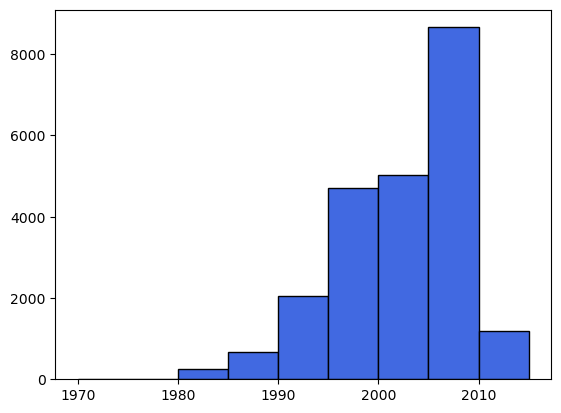

In [1803]:
plt.hist(dfc["ApprovalFY"], bins=range(int(dfc["ApprovalFY"].min()), int(dfc["ApprovalFY"].max()) + step, step),
         color="royalblue", edgecolor="black")

TODO: Explicar que se codifican los lustros y se muestran sus resultados

In [1804]:
dfc["ApprovalFY_Grouped_cod"] = dfc["ApprovalFY_Grouped"].astype('category').cat.codes.astype('int64')
print(dfc["ApprovalFY_Grouped_cod"].value_counts())


ApprovalFY_Grouped_cod
7    8660
6    5016
5    4718
4    2048
8    1180
3     665
2     265
1      18
0       5
Name: count, dtype: int64


##### - NoEmp

TODO: Explicar que se buscaba con esto

In [1805]:
dfc['NoEmp'].value_counts()

NoEmp
1       3533
2       3025
3       1952
4       1634
5       1408
        ... 
171        1
4685       1
127        1
235        1
117        1
Name: count, Length: 189, dtype: int64

TODO: Explicar que se analizo primero la distribucion

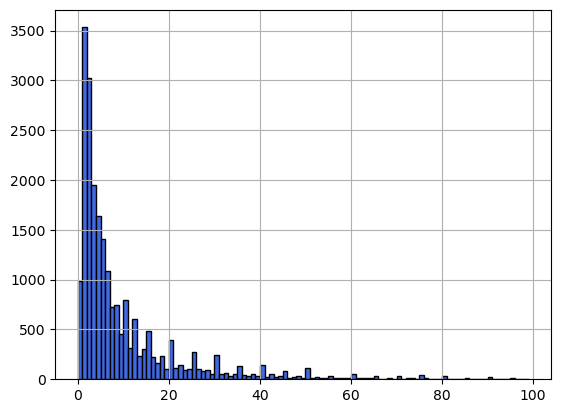

In [1806]:
hist = dfc["NoEmp"].hist(bins=range(0, 100, 1), color="royalblue", edgecolor="black")

TODO: Explicar como se agrupan y el pq

In [1807]:
# Agrupar número de empleados en las categorías especificadas
bins = [-1, 0, 2, 5, 15, np.inf]
labels = ["0", "1-2", "3-5", "6-15", "15+"]
dfc["NoEmp_Grouped"] = pd.cut(dfc["NoEmp"], bins=bins, labels=labels, right=True)

# Contar la cantidad de cada categoría
category_counts = dfc["NoEmp_Grouped"].value_counts().sort_index()

TODO: Indicar que se muestra el resultado en forma de grafico de barras

<Axes: xlabel='NoEmp_Grouped'>

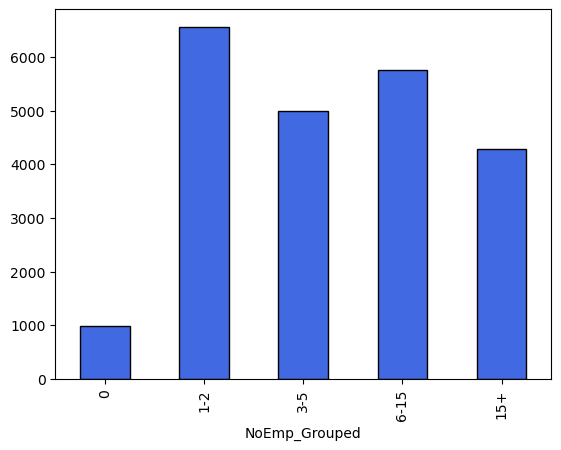

In [1808]:
category_counts.plot(kind='bar', color='royalblue', edgecolor='black')

TODO: Indicar que se codifican y muestran lso resultados

In [1809]:
dfc["NoEmp_Grouped_cod"] = dfc["NoEmp_Grouped"].astype('category').cat.codes.astype('int64')
dfc["NoEmp_Grouped_cod"].value_counts()

NoEmp_Grouped_cod
1    6558
3    5750
2    4994
4    4286
0     987
Name: count, dtype: int64

##### - CreateJob

TODO: Explicar pq esto

In [1810]:
dfc['CreateJob'].value_counts()

CreateJob
0      15507
1       1395
2       1366
3        742
4        570
       ...  
163        1
79         1
134        1
180        1
252        1
Name: count, Length: 88, dtype: int64

TODO: Explicar pq esto

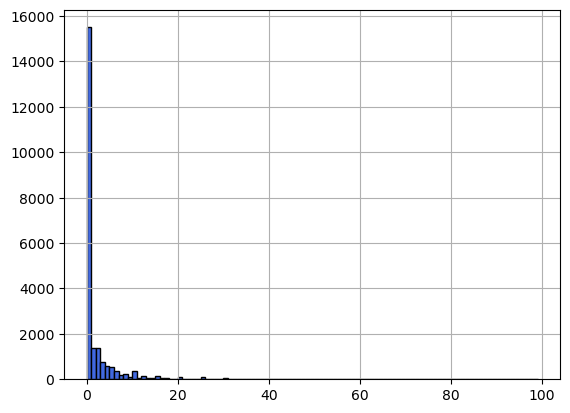

In [1811]:
hist = dfc["CreateJob"].hist(bins=range(0, 100, 1), color="royalblue", edgecolor="black")

Al haber una diferencia muy grande entre no crear y crear trabajo lo pasaremos a binario (0-> Trabajo no creaod, 1-> Trabajo Creado)

In [1812]:
# Convertir la columna 'CreateJob' en una variable binaria
dfc["CreateJob_Binary"] = dfc["CreateJob"].apply(lambda x: 0 if x == 0 else 1)

# Mostrar el conteo de cada categoría
dfc["CreateJob_Binary"].value_counts()


CreateJob_Binary
0    15507
1     7068
Name: count, dtype: int64

##### - RetainedJob

TODO: Explicar pq esto

In [1813]:
dfc['RetainedJob'].value_counts()

RetainedJob
0      11533
1       1944
2       1742
3       1131
4        887
       ...  
220        1
235        1
96         1
212        1
117        1
Name: count, Length: 127, dtype: int64

TODO: Explicar pq esto

<Axes: >

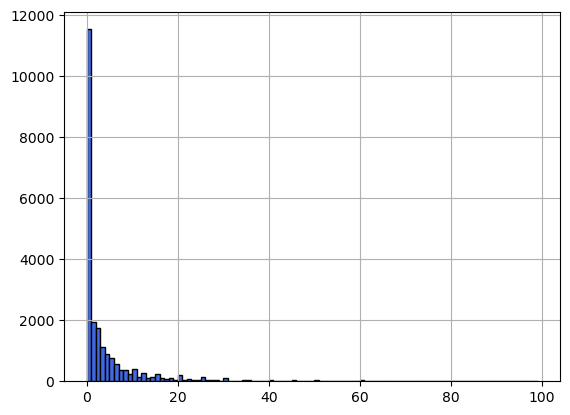

In [1814]:
dfc["RetainedJob"].hist(bins=range(0, 100, 1), color="royalblue", edgecolor="black")


Al haber una diferencia muy grande entre no mantener o mantener trabajadores lo pasaremos a binario (0-> Trabajo no mantenido, 1-> Trabajo mantenido)

In [1815]:
# Convertir la columna 'CreateJob' en una variable binaria
dfc["RetainedJob_Binary"] = dfc["RetainedJob"].apply(lambda x: 0 if x == 0 else 1)

dfc["RetainedJob_Binary"].value_counts()

RetainedJob_Binary
0    11533
1    11042
Name: count, dtype: int64

##### - DisbursementGross

TODO Explicar pq esto

In [1816]:
# print(conteo_valores["DisbursementGross"])
dfc['DisbursementGross'].value_counts()

DisbursementGross
$50,000.00      899
$100,000.00     861
$25,000.00      819
$150,000.00     479
$35,000.00      350
               ... 
$106,984.00       1
$665,100.00       1
$33,916.00        1
$29,469.00        1
$311,800.00       1
Name: count, Length: 7361, dtype: int64

TODO: Explicar que se hace aqui

In [1817]:
dfc["DisbursementGross"] = dfc["DisbursementGross"].replace('[\$,]', '', regex=True).str.strip().astype(float).astype(int)

dfc["DisbursementGross"].value_counts()

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipykernel_95334/2828205065.py:1: SyntaxWarning: invalid escape sequence '\$'
  dfc["DisbursementGross"] = dfc["DisbursementGross"].replace('[\$,]', '', regex=True).str.strip().astype(float).astype(int)


DisbursementGross
50000     899
100000    861
25000     819
150000    479
35000     350
         ... 
106984      1
665100      1
33916       1
29469       1
311800      1
Name: count, Length: 7361, dtype: int64

TODO: Explicar q se hace aqui y que se buscaba

In [1818]:
# Definir nuevos límites (bins) basados en la distribución analizada
bins = [-1, 30000, 75000, 150000, 500000, np.inf]
labels = ["0-30k", "30k-75k", "75k-150k", "150k-500k", "500k+"]

# Agrupar según los rangos definidos
dfc["DisbursementGross_Grouped"] = pd.cut(dfc["DisbursementGross"], bins=bins, labels=labels, right=True)

# Mostrar el conteo por cada rango
print(dfc["DisbursementGross_Grouped"].value_counts())


DisbursementGross_Grouped
30k-75k      6048
75k-150k     5536
150k-500k    5179
0-30k        4252
500k+        1560
Name: count, dtype: int64


TODO: Explicar que se codifica y muestran resultados

In [1819]:
dfc["DisbursementGross_Grouped_cod"] = dfc["DisbursementGross_Grouped"].astype('category').cat.codes.astype('int64')
dfc["DisbursementGross_Grouped_cod"].value_counts()

DisbursementGross_Grouped_cod
1    6048
2    5536
3    5179
0    4252
4    1560
Name: count, dtype: int64

## 1.5 Correlacion

TODO: Explicar pq se copia en un nuevo df

In [1820]:
dfn = dfc.copy()
dfn.dtypes

ApprovalDate                        int64
ApprovalFY                          int64
NoEmp                               int64
CreateJob                           int64
RetainedJob                         int64
DisbursementDate                    int64
DisbursementGross                   int64
Accept                              int64
NewExist_Binary                     int64
Franchise_Binary                    int64
UrbanRural_Binary                   int64
RevLineCr_Binary                    int64
LowDoc_Binary                       int64
ApprovalDate_quarter                int64
DisbursementDate_quarter            int64
Bank_Categorized                   object
Bank_Categorized_cod                int64
BankState_Categorized              object
BankState_Categorized_cod           int64
ApprovalFY_Grouped                 object
ApprovalFY_Grouped_cod              int64
NoEmp_Grouped                    category
NoEmp_Grouped_cod                   int64
CreateJob_Binary                  

TODO: Explicar que correlacion solo funciona con numericas asiq se borra el unico que es objeto

In [1821]:
dfn = dfn.select_dtypes(include=[int]) 
dfn.dtypes


ApprovalDate                     int64
ApprovalFY                       int64
NoEmp                            int64
CreateJob                        int64
RetainedJob                      int64
DisbursementDate                 int64
DisbursementGross                int64
Accept                           int64
NewExist_Binary                  int64
Franchise_Binary                 int64
UrbanRural_Binary                int64
RevLineCr_Binary                 int64
LowDoc_Binary                    int64
ApprovalDate_quarter             int64
DisbursementDate_quarter         int64
Bank_Categorized_cod             int64
BankState_Categorized_cod        int64
ApprovalFY_Grouped_cod           int64
NoEmp_Grouped_cod                int64
CreateJob_Binary                 int64
RetainedJob_Binary               int64
DisbursementGross_Grouped_cod    int64
dtype: object

TODO: Explicar que se calcula la matrizz de correlacion y se muestra

In [1822]:
corrMatrix = dfn.corr()
print(corrMatrix)

                               ApprovalDate  ApprovalFY     NoEmp  CreateJob  \
ApprovalDate                       1.000000    0.003570  0.005026   0.019193   
ApprovalFY                         0.003570    1.000000 -0.080918  -0.109155   
NoEmp                              0.005026   -0.080918  1.000000   0.014674   
CreateJob                          0.019193   -0.109155  0.014674   1.000000   
RetainedJob                        0.019312   -0.106402  0.018788   0.998855   
DisbursementDate                   0.254538    0.036296 -0.005554   0.006650   
DisbursementGross                  0.020210   -0.063986  0.106553   0.003387   
Accept                             0.005163   -0.154456  0.034753   0.011666   
NewExist_Binary                    0.008390   -0.030607  0.052638   0.022865   
Franchise_Binary                   0.012765   -0.038774  0.016045  -0.002413   
UrbanRural_Binary                  0.008538   -0.265475  0.024546   0.019209   
RevLineCr_Binary                  -0.008

TODO: Explicar que se representa con un mapa de calor

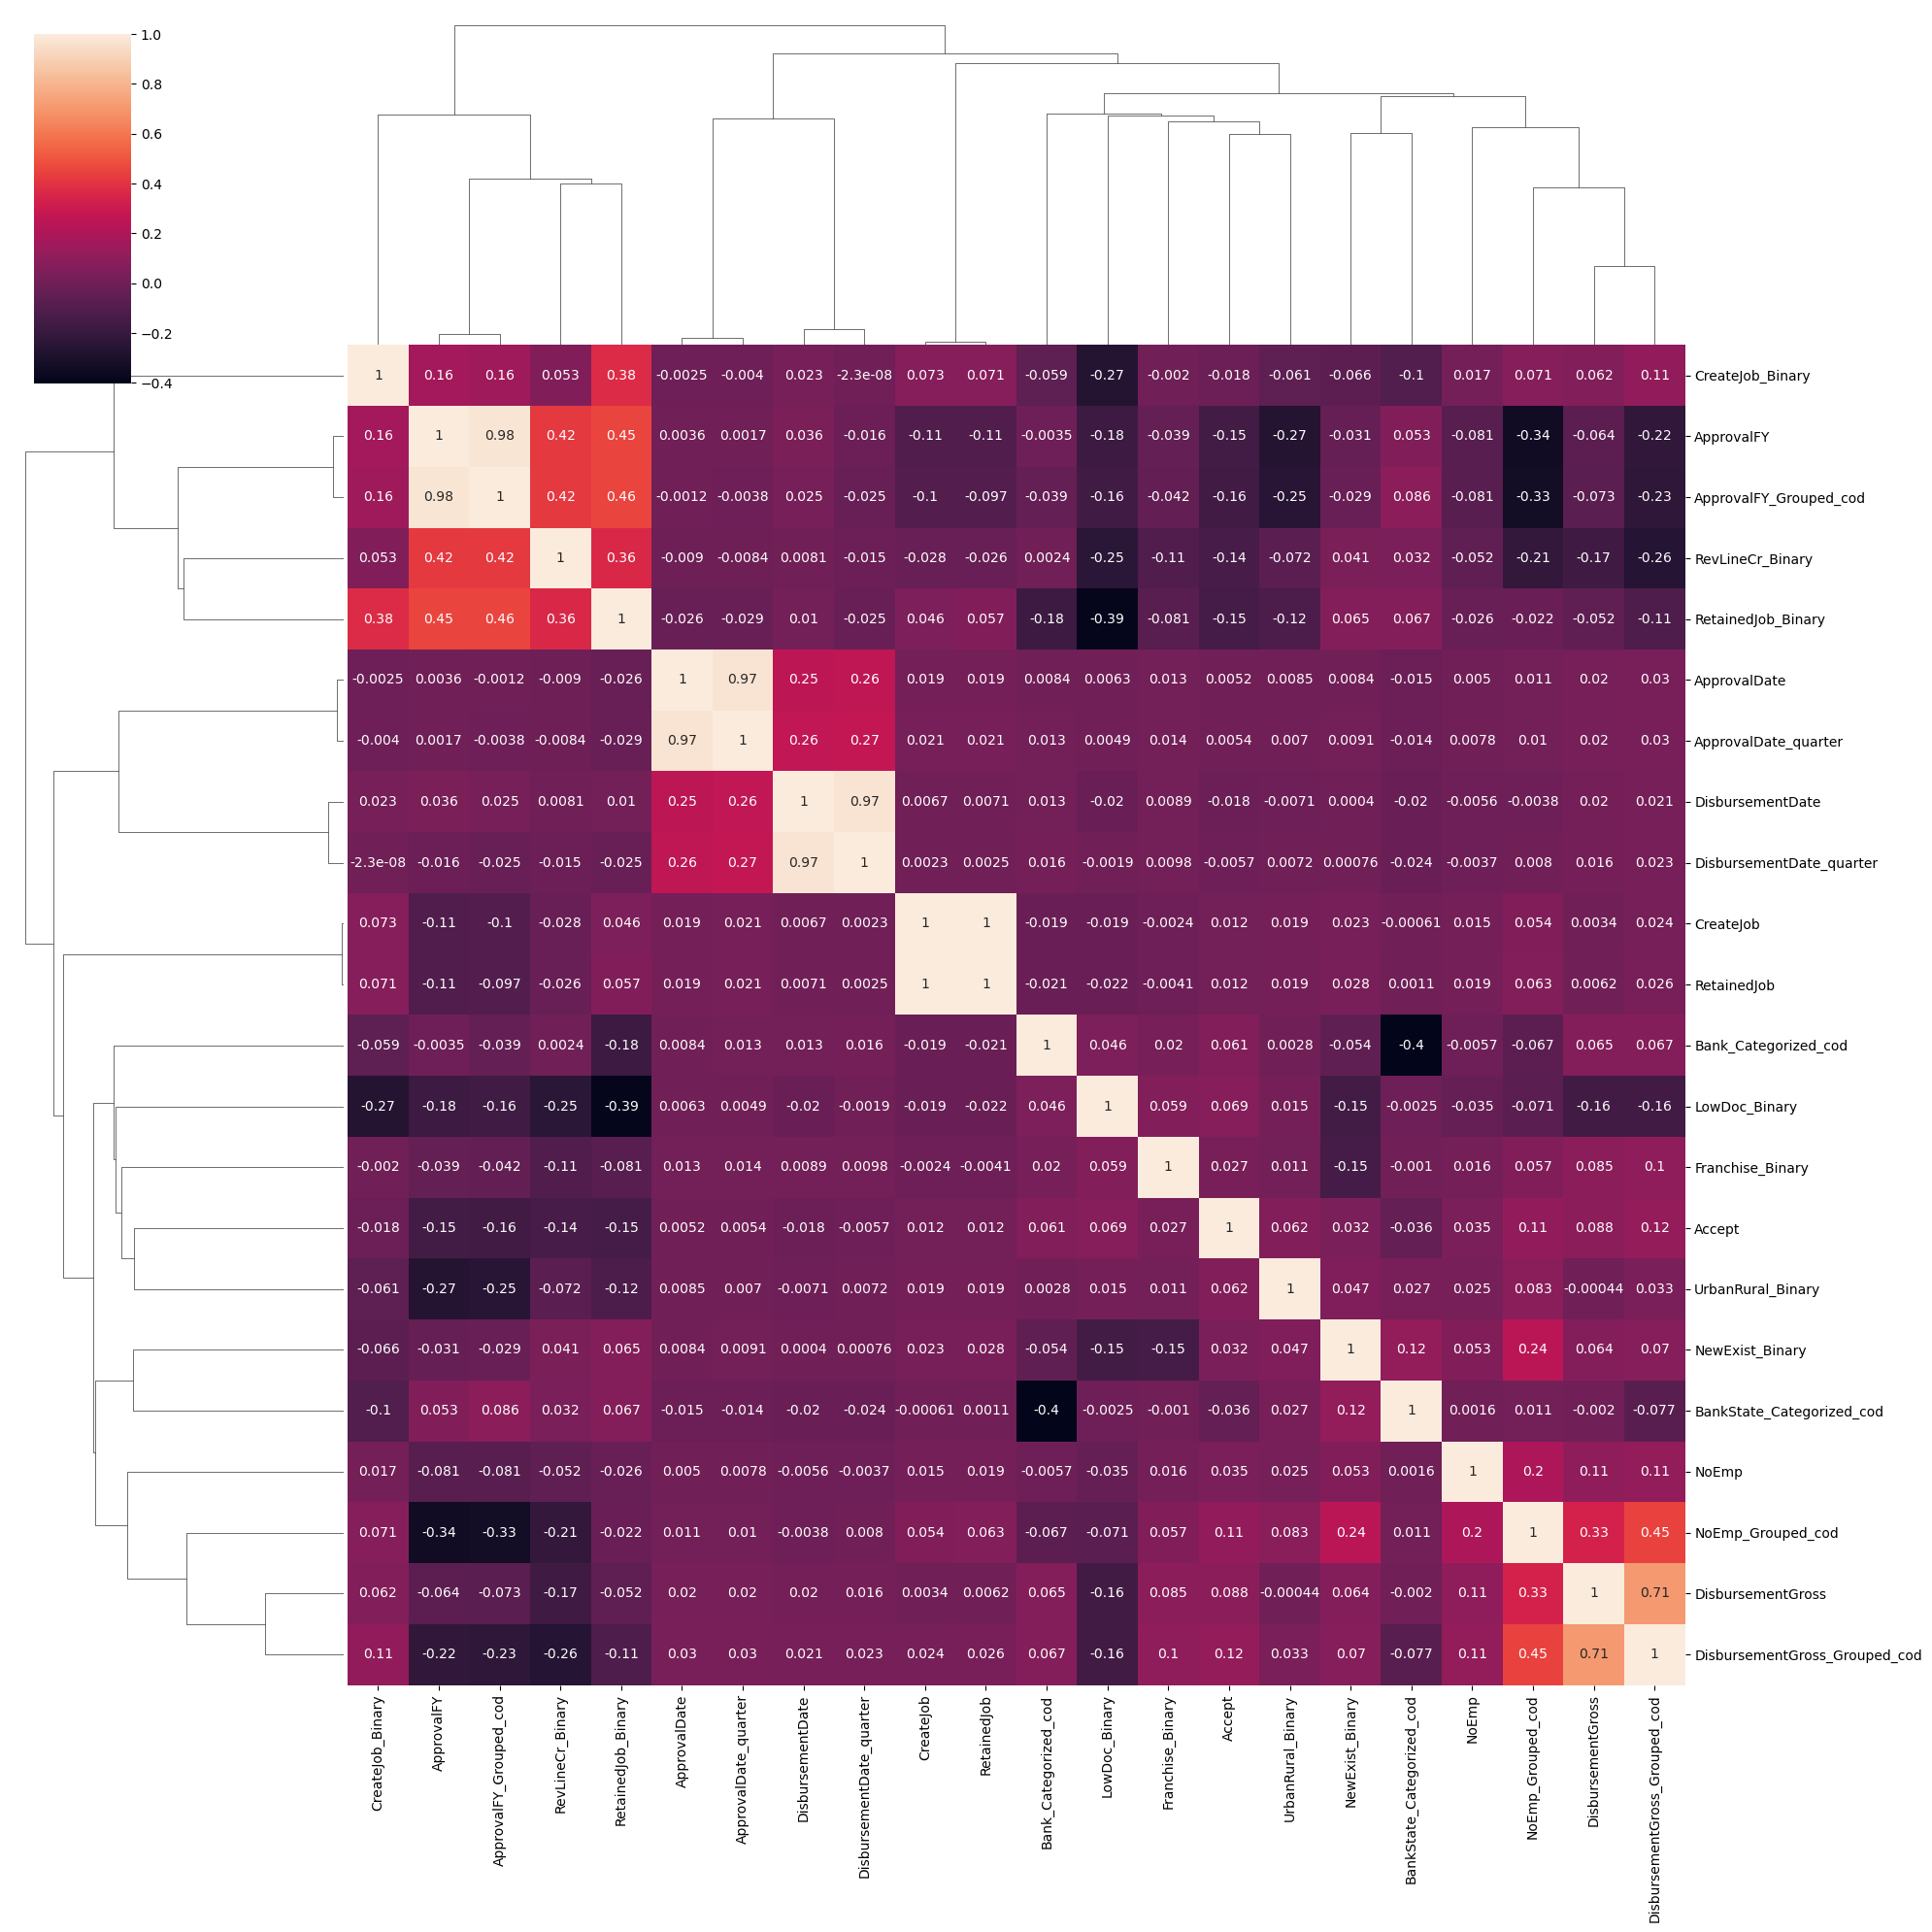

In [1823]:
sns.clustermap(corrMatrix, annot=True, figsize=(20,20))
plt.show()

TODO: Yo aqui es donde borraria las que no nos interesan y no antes (antes solo borrar las de pasos intermedios)

TODO: Tambien borraria aqui las muy correladas, como es el caso de ApprovalFY_Grouped_num que lo eliminas en el siguiente apartado en vez de en este por la cara

In [1824]:
# dfc = dfc.drop(columns=['ApprovalFY'])                      
# dfc = dfc.drop(columns=['ApprovalDate'])                    
# dfc = dfc.drop(columns=['NoEmp'])                           
# dfc = dfc.drop(columns=['CreateJob'])                       
# dfc = dfc.drop(columns=['RetainedJob'])                     
# dfc = dfc.drop(columns=['DisbursementDate'])                
# dfc = dfc.drop(columns=['DisbursementGross'])               
# dfc = dfc.drop(columns=['Accept'])                          
# dfc = dfc.drop(columns=['NewExist_Binary'])                 
# dfc = dfc.drop(columns=['Franchise_Binary'])                
# dfc = dfc.drop(columns=['UrbanRural_Binary'])               
# dfc = dfc.drop(columns=['RevLineCr_Binary'])                
# dfc = dfc.drop(columns=['LowDoc_Binary'])                   
# dfc = dfc.drop(columns=['ApprovalDate_quarter'])            
# dfc = dfc.drop(columns=['DisbursementDate_quarter'])        
# dfc = dfc.drop(columns=['Bank_Categorized'])                
# dfc = dfc.drop(columns=['Bank_Categorized_cod'])            
# dfc = dfc.drop(columns=['BankState_Categorized'])           
# dfc = dfc.drop(columns=['BankState_Categorized_cod'])       
# dfc = dfc.drop(columns=['ApprovalFY_Grouped'])              
# dfc = dfc.drop(columns=['ApprovalFY_Grouped_cod'])          
# dfc = dfc.drop(columns=['NoEmp_Grouped'])                   
# dfc = dfc.drop(columns=['NoEmp_Grouped_cod'])               
# dfc = dfc.drop(columns=['CreateJob_Binary'])                
# dfc = dfc.drop(columns=['RetainedJob_Binary'])              
# dfc = dfc.drop(columns=['DisbursementGross_Grouped'])       
# dfc = dfc.drop(columns=['DisbursementGross_Grouped_cod'])   

In [1825]:
dfn = dfc.copy()
dfn = dfn.select_dtypes(include=[int]) 
dfn.dtypes

ApprovalDate                     int64
ApprovalFY                       int64
NoEmp                            int64
CreateJob                        int64
RetainedJob                      int64
DisbursementDate                 int64
DisbursementGross                int64
Accept                           int64
NewExist_Binary                  int64
Franchise_Binary                 int64
UrbanRural_Binary                int64
RevLineCr_Binary                 int64
LowDoc_Binary                    int64
ApprovalDate_quarter             int64
DisbursementDate_quarter         int64
Bank_Categorized_cod             int64
BankState_Categorized_cod        int64
ApprovalFY_Grouped_cod           int64
NoEmp_Grouped_cod                int64
CreateJob_Binary                 int64
RetainedJob_Binary               int64
DisbursementGross_Grouped_cod    int64
dtype: object

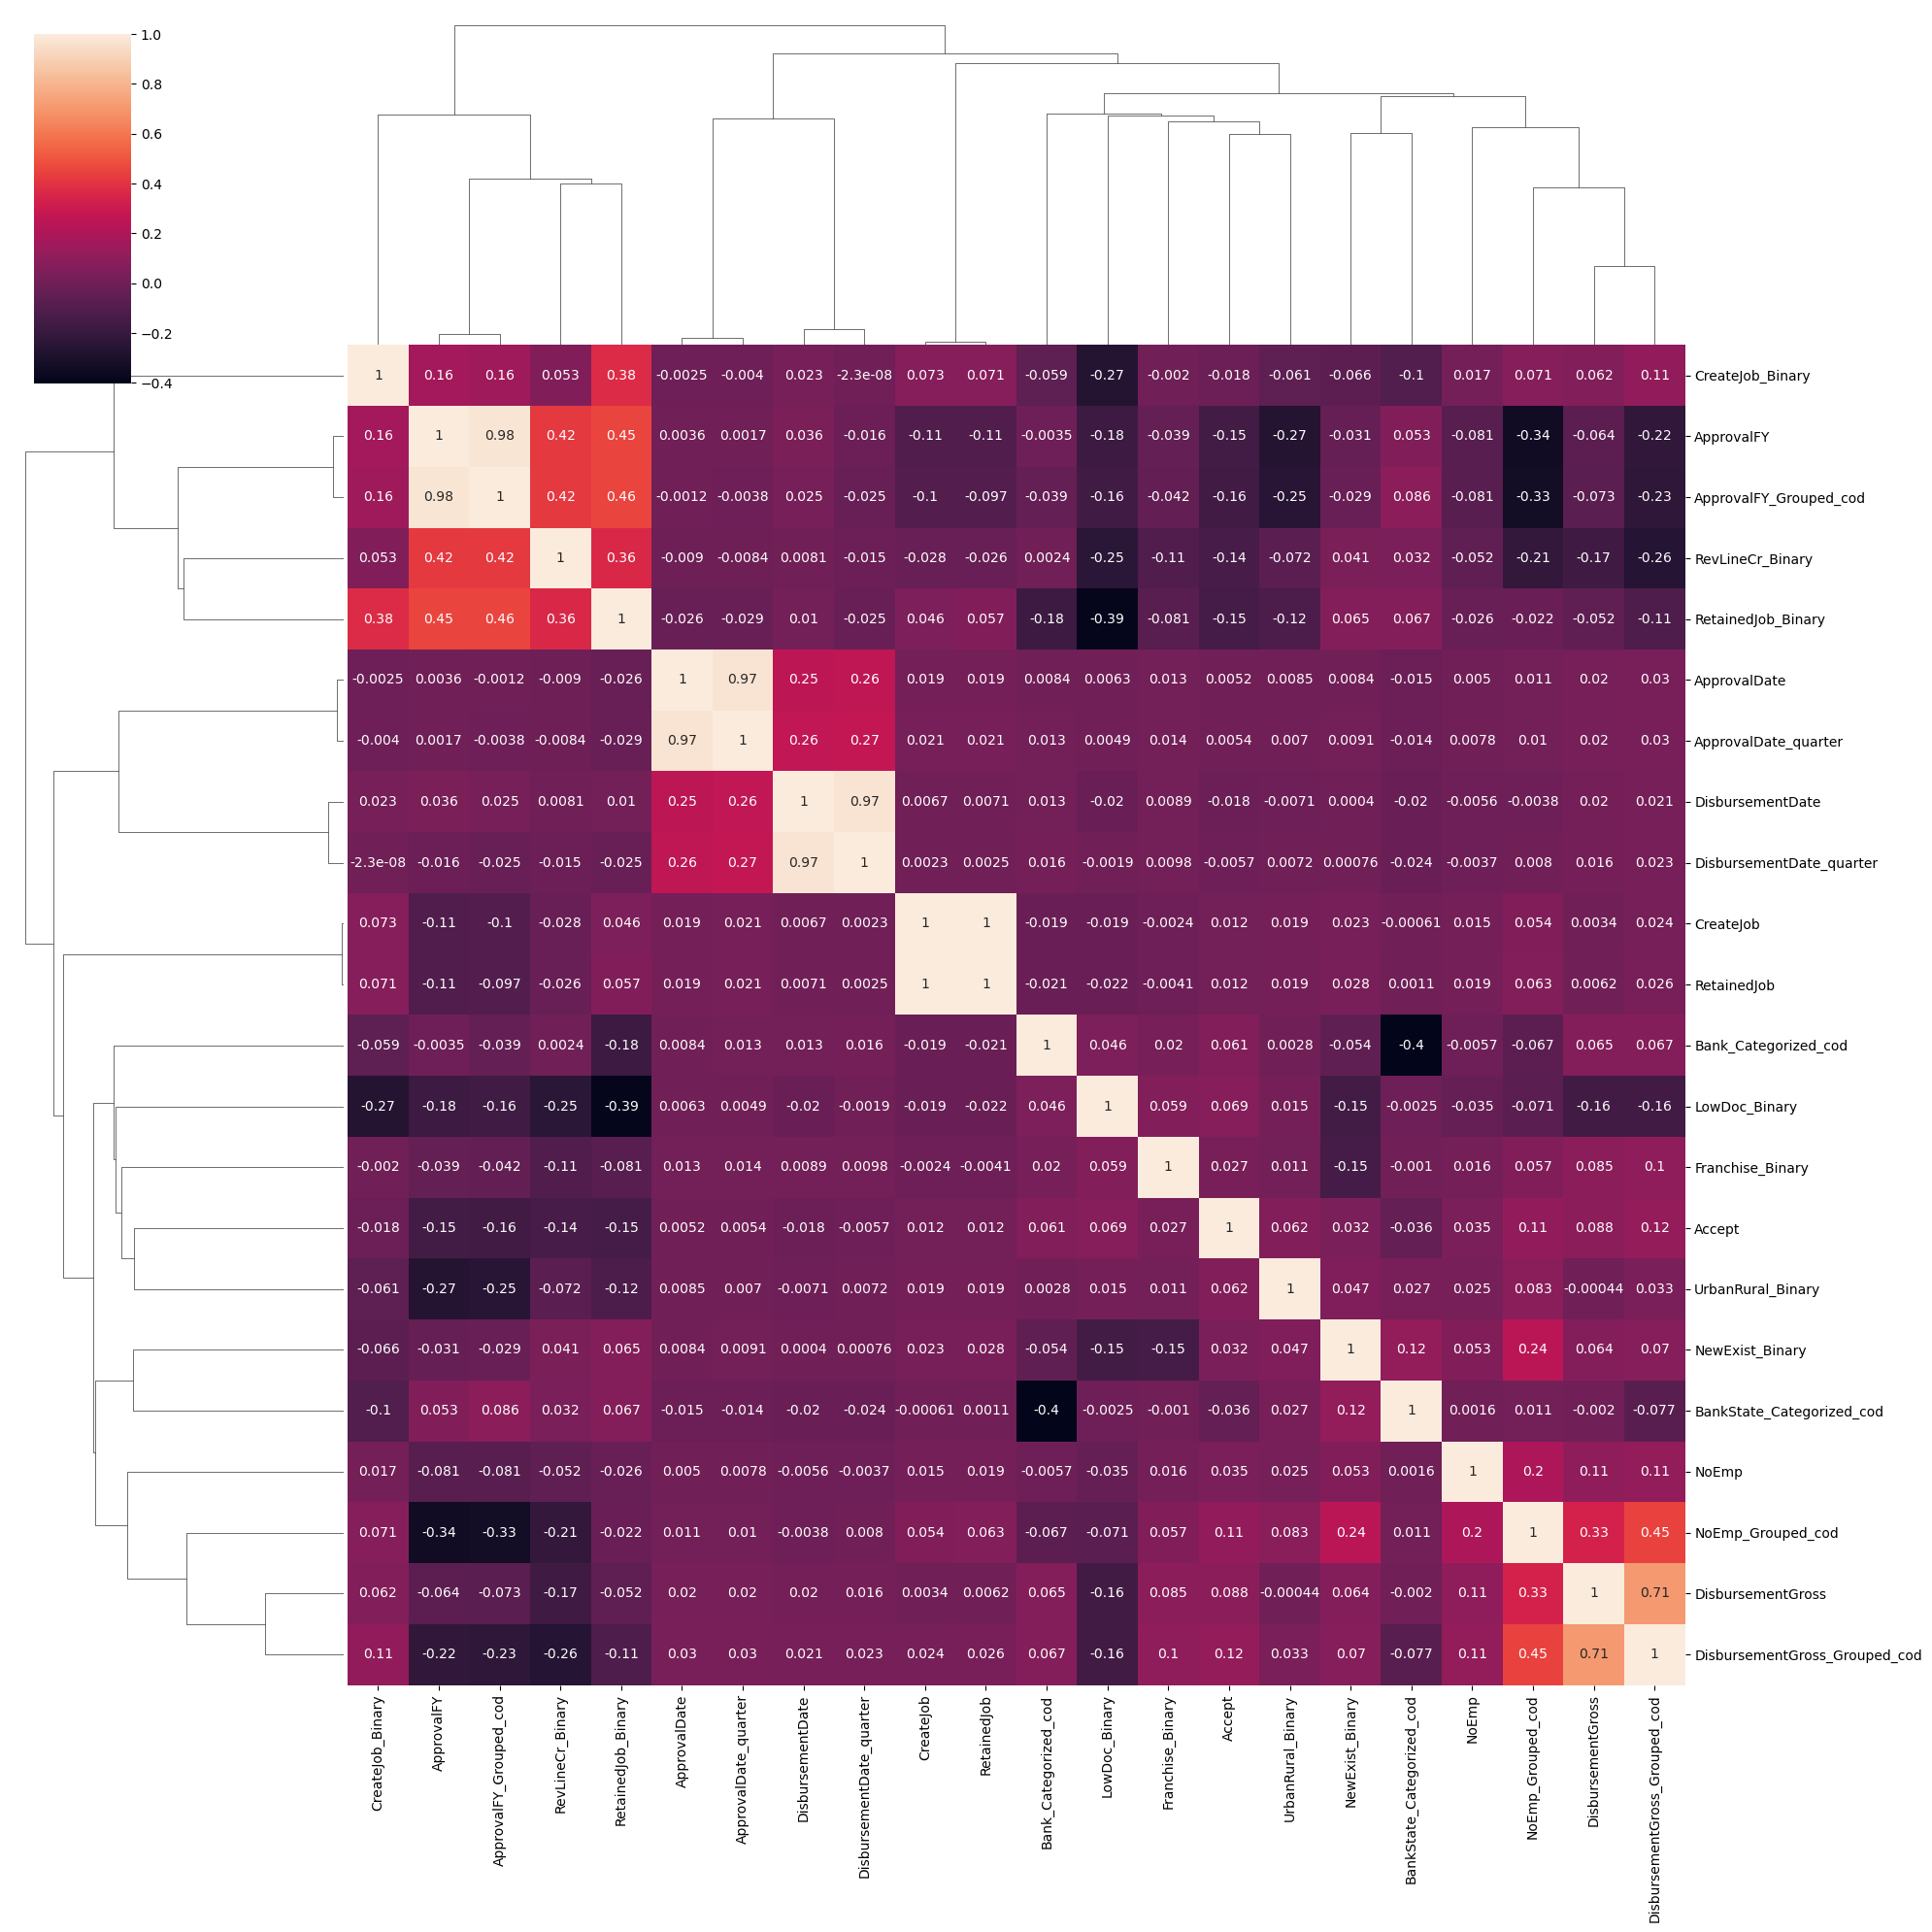

In [1826]:
sns.clustermap(corrMatrix, annot=True, figsize=(20,20))
plt.show()

## 1.6 Advanced 

In [1827]:
dfa = dfc.copy()
print(dfa.dtypes)

ApprovalDate                        int64
ApprovalFY                          int64
NoEmp                               int64
CreateJob                           int64
RetainedJob                         int64
DisbursementDate                    int64
DisbursementGross                   int64
Accept                              int64
NewExist_Binary                     int64
Franchise_Binary                    int64
UrbanRural_Binary                   int64
RevLineCr_Binary                    int64
LowDoc_Binary                       int64
ApprovalDate_quarter                int64
DisbursementDate_quarter            int64
Bank_Categorized                   object
Bank_Categorized_cod                int64
BankState_Categorized              object
BankState_Categorized_cod           int64
ApprovalFY_Grouped                 object
ApprovalFY_Grouped_cod              int64
NoEmp_Grouped                    category
NoEmp_Grouped_cod                   int64
CreateJob_Binary                  

In [ ]:
# Realizar One-Hot Encoding en la variable 'BankState_Categorized'
dfa = pd.get_dummies(dfa, columns=['BankState_Categorized'], prefix='BankState').astype(int)

# Verificar las nuevas columnas creadas
print(dfa.columns)

ValueError: invalid literal for int() with base 10: 'CITIZENS BANK NATL ASSOC'

In [ ]:
dfa.head()

,ApprovalDate,ApprovalFY,NoEmp,NewExist,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,Accept,Franchise_Binary,BankState_Categorized_num,CreateJob_Binary,RetainedJob_Binary,DisbursementGross_Grouped_num,BankState_DE,BankState_IL,BankState_OH,BankState_Otros,BankState_RI
0,11,2006,2,0,2,0,1,0,0,12,8000,1,0,4,0,1,0,0,0,0,0,1
1,6,2005,2,0,2,1,1,0,0,7,166000,1,0,2,1,1,3,0,0,1,0,0
2,3,2003,2,0,2,1,0,1,0,3,25000,1,0,2,1,1,0,0,0,1,0,0
3,6,1995,2,0,0,1,1,0,0,1,220100,1,0,2,0,0,3,0,0,1,0,0
4,4,2009,0,1,0,0,1,0,0,5,25000,0,0,2,0,0,0,0,0,1,0,0


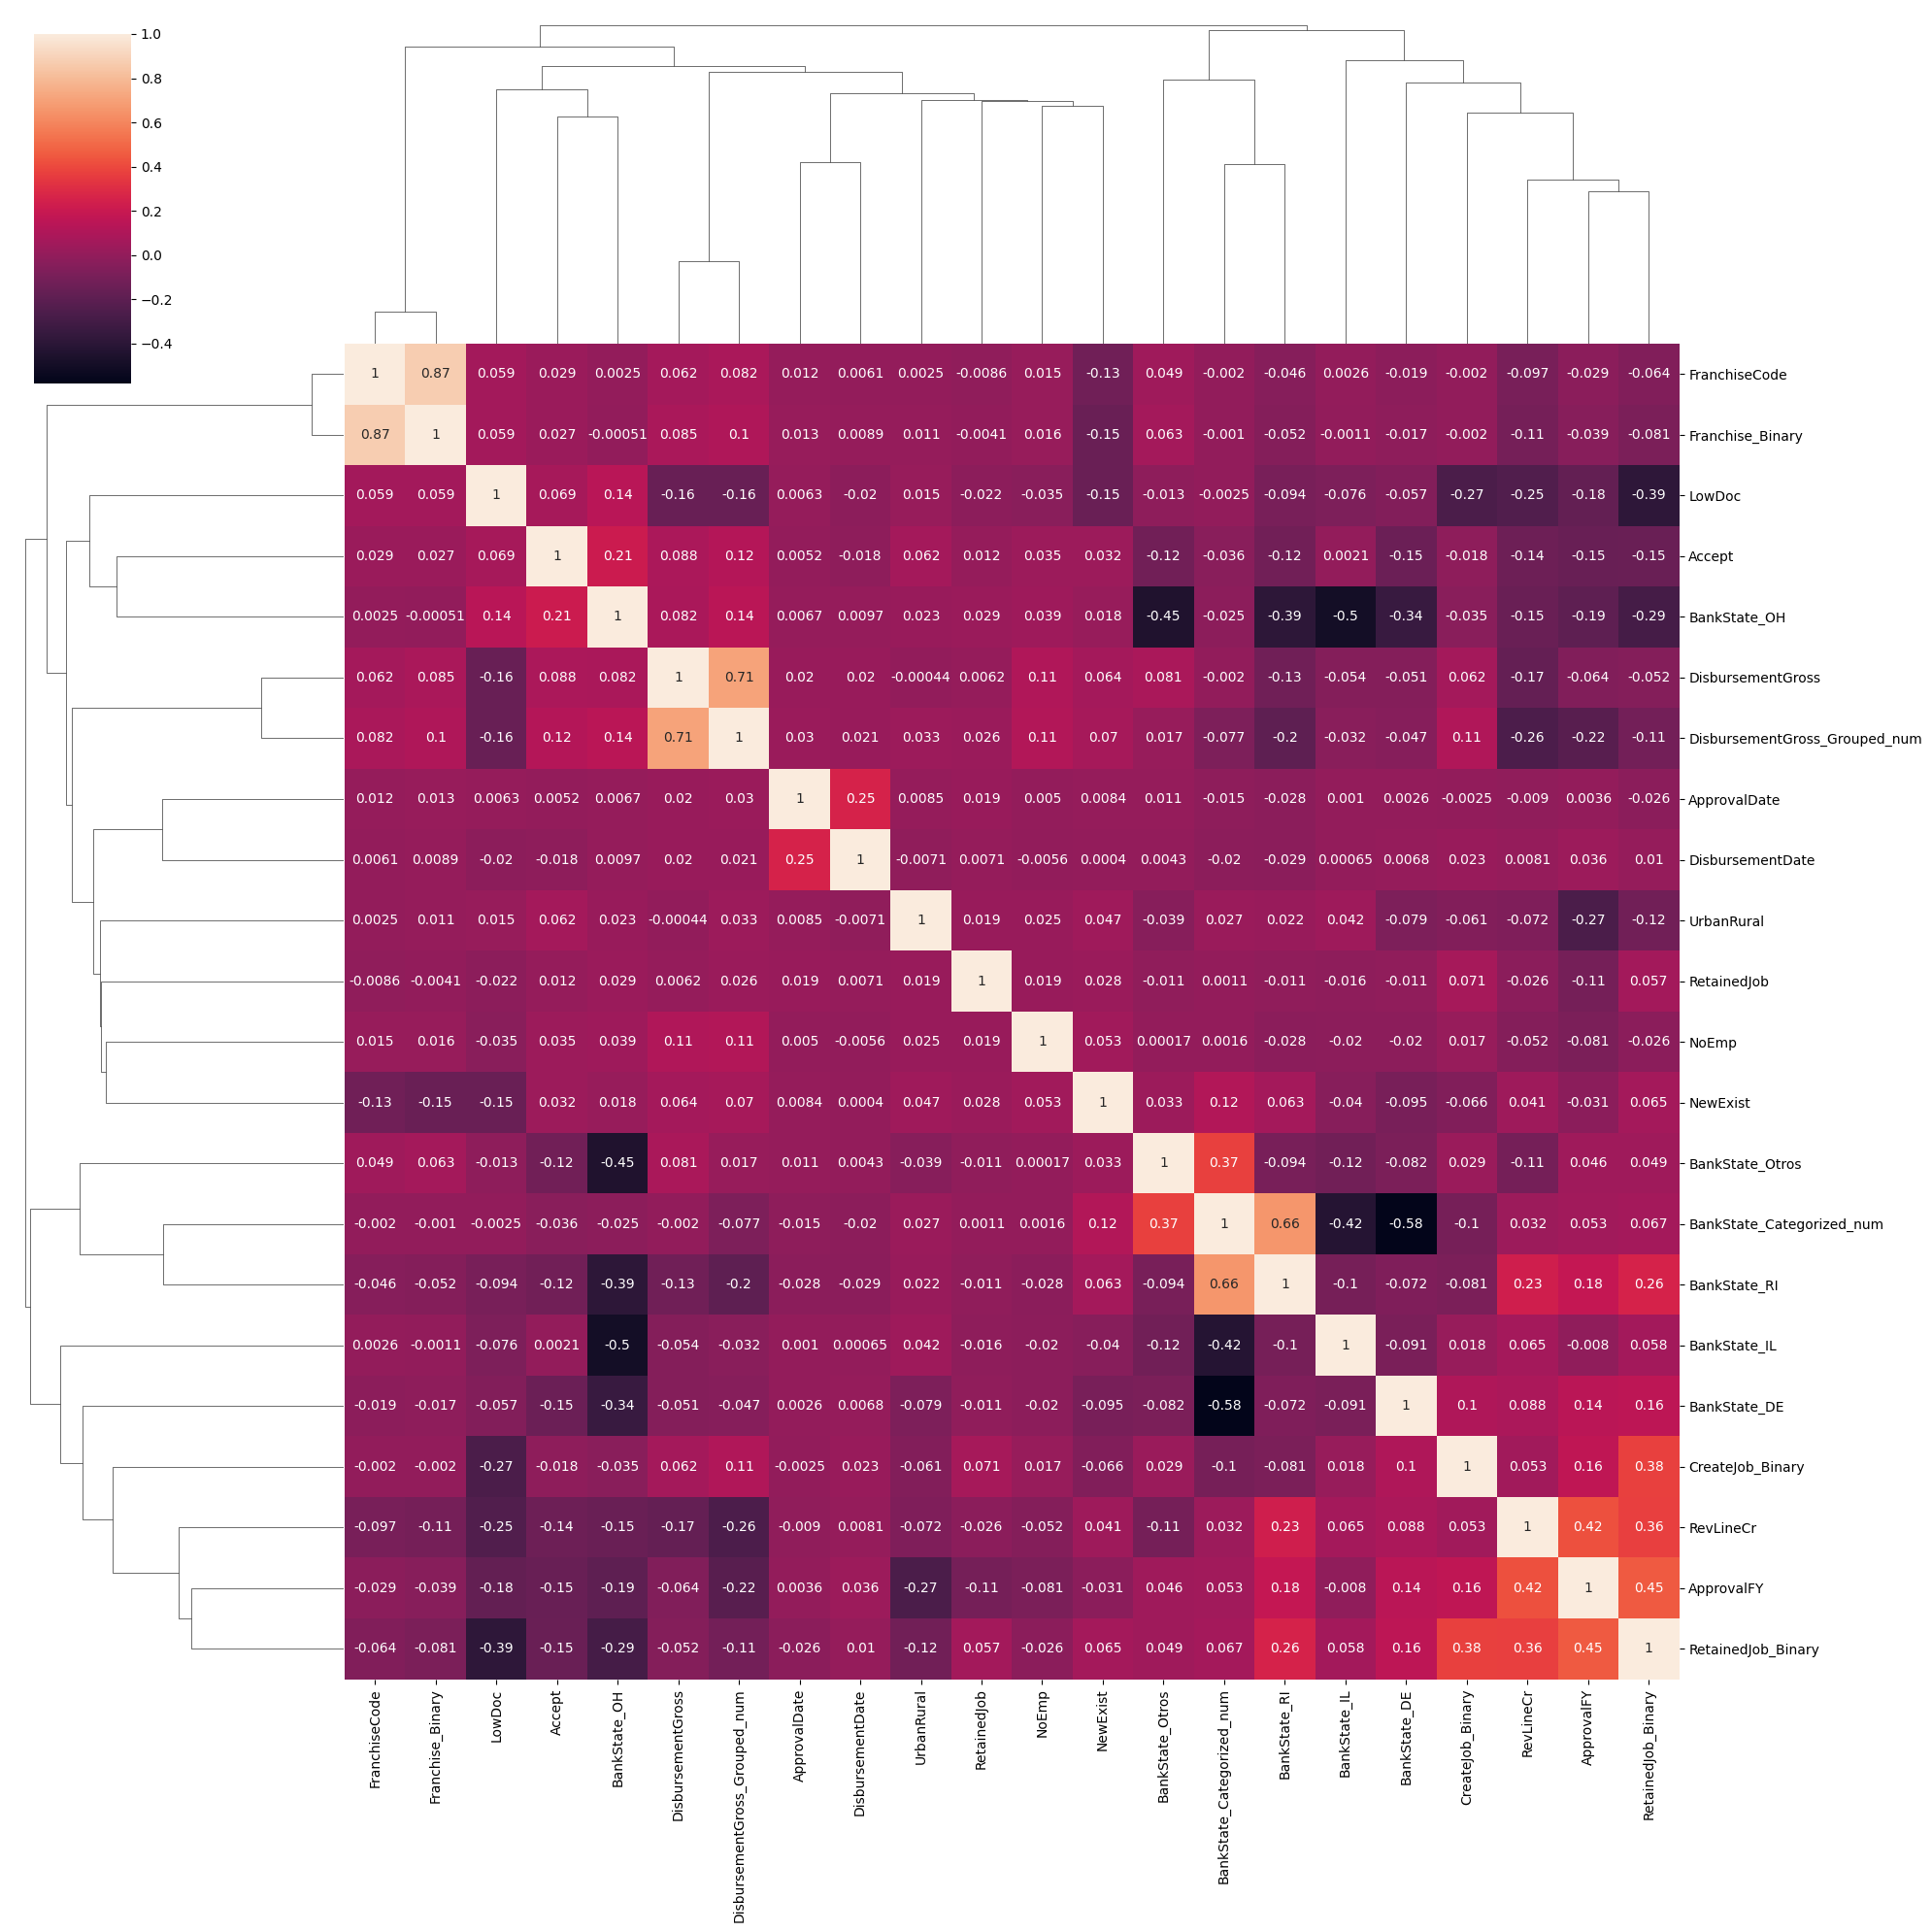

In [ ]:
corrMatrixa = dfa.corr()
sns.clustermap(corrMatrixa, annot=True, figsize=(20, 20)) # Aumenta le dimensioni qui
plt.show()

## 1.7 Exportar CSV

In [ ]:
# Exportar el DataFrame 'dfn' a un archivo CSV
dfc.to_csv('./formated/dfn_exportado.csv', index=False)

OSError: Cannot save file into a non-existent directory: 'formated'

## 1.8 Create Test

In [ ]:
df_test = pd.read_csv("data/test_nolabel.csv")

In [ ]:
df_test = df_test.drop(columns=featuresUseless)
df_testn = df_test.copy()
df_testa = df_test.copy()

# Verificar los tipos de datos de las columnas
df_test.dtypes

Bank                  object
BankState             object
ApprovalDate          object
ApprovalFY            object
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
DisbursementDate      object
DisbursementGross     object
dtype: object

- Test dfn

In [ ]:
# ApprovalDate                     int64
# ApprovalFY                       int64
# NoEmp                            int64
# NewExist                         int64
# RetainedJob                      int64
# FranchiseCode                    int64
# UrbanRural                       int64
# RevLineCr                        int64
# LowDoc                           int64
# DisbursementDate                 int64
# DisbursementGross                int64
# Accept                           int64
# Franchise_Binary                 int64
# BankState_Categorized_num        int64
# CreateJob_Binary                 int64
# RetainedJob_Binary               int64
# DisbursementGross_Grouped_num    int64

- Test dfa